In [1]:
import pandas as pd

In [2]:
from Stocker import stocker
from Downloader import downloader

In [3]:
def adjust_data(stock):
    '''we define this function to specify the columns we will use in the stocker class'''
    filepath = 'data//'+ stock+"_price.csv"
    data = pd.read_csv(filepath)
    data = data[['date','adjclose','volume']]
    data.columns=['Date',stock,'Volume']
    data['Date'] = pd.to_datetime(data['Date'])
    return(data)

In [4]:
data = adjust_data('AAPL')
data.head()

,Date,AAPL,Volume
0,2009-05-08,15.977063,116991000.0
1,2009-05-11,16.024052,101164700.0
2,2009-05-12,15.387154,152370400.0
3,2009-05-13,14.777458,148992900.0
4,2009-05-14,15.205353,111956600.0


In [5]:
stocker1 = stocker(seed=9001) #this is to specify random seed
stocker1.import_data(data) #it takes a dataframe as import

import stock data from AAPL


In [6]:
ypred_df =stocker1.generate_arima((5,1,0))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


first half implementation finished


In [7]:
ypred_df

,arima
Date,
2009-05-08,15.768711
2009-05-11,15.149903
2009-05-12,14.745513
2009-05-13,15.075896
2009-05-14,15.129593
...,...
2020-05-04,289.506407
2020-05-05,291.286215
2020-05-06,296.596872


In [8]:
stocker1.data[stocker1.target]

0        15.977063
1        16.024052
2        15.387154
3        14.777458
4        15.205353
           ...    
2765    292.368561
2766    296.756683
2767    299.818390
2768    302.919983
2769    310.130005
Name: AAPL, Length: 2770, dtype: float64

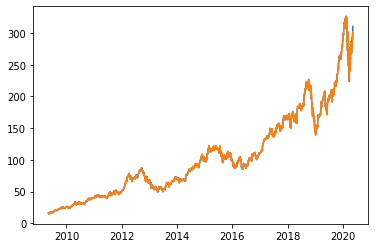

In [9]:
import matplotlib.pyplot as plt
plt.plot(stocker1.data['Date'],stocker1.data[stocker1.target])
plt.plot(ypred_df)

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred_df,stocker1.data[stocker1.target])

6.512128796968621